# kNN Classification solution
### Imports

In [1]:
import h5py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import sklearn as skl
from matplotlib import pyplot as plt
from time import time
import shap

### Loading & Preprocessing Data

In [2]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        return pd.DataFrame(f[name][:])

train = load_data('train')
test  = load_data('test')
print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]


Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)


In [3]:
def find_unique(X):
  means = np.mean(np.array(X), axis=0)
  unique_values, unique_indices = np.unique(means, return_index=True)
  sorted_indices = np.sort(unique_indices)
  unique_variables = []
  for i in unique_indices:
    unique_variables.append(all_variables[i])
  return unique_variables
def find_multivalues(X, unique_variables):
    multivalue_variables = []
    uniques = []
    j = 0
    for i in unique_variables:
        uniques.append(np.unique(X[i]))
        if len(uniques[j]) >= 2:
            multivalue_variables.append(i)
        j+=1
    return multivalue_variables

In [4]:
X = train[all_variables]
unique_variables = find_unique(X)
X = train[unique_variables]
multivariables = find_multivalues(X, unique_variables)
X = train[multivariables]
X = pd.DataFrame(StandardScaler().fit_transform(X))
X.columns = multivariables
print('Found {0:d} unusuable features!'.format(len(all_variables)-len(multivariables)))
y = train['Truth']
y_num = np.zeros(len(y))
for i in range(len(y)):
    if y[i]:
        y_num[i] = 1
y_num = pd.Series(y_num)
X_train, X_test, y_train, y_test = train_test_split(X, y_num, test_size=.25, random_state=16)

Found 17 unusuable features!


### Feature Choice with Lasso CV

In [6]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f"%reg.alpha_)
print("Best score using built-in LassoCV: %f"%reg.score(X_train,y_train))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")



Best alpha using built-in LassoCV: 0.000256
Best score using built-in LassoCV: 0.615492
Lasso picked 95 variables and eliminated the other 48 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

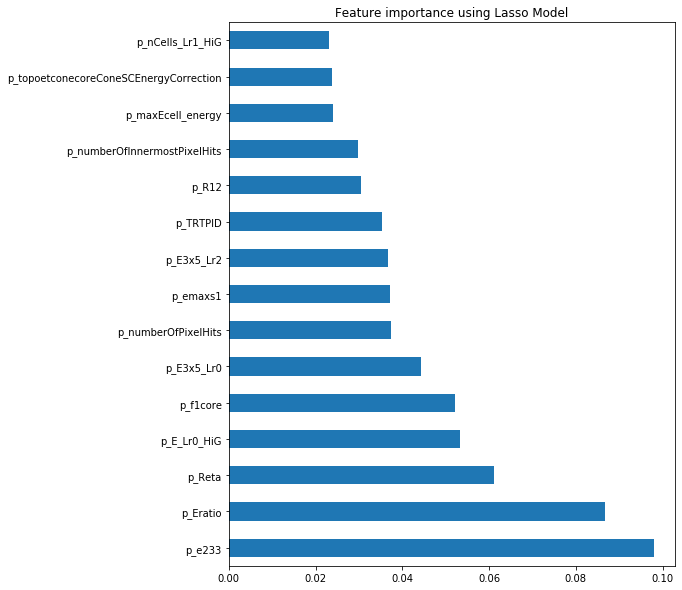

In [7]:
imp_coef = coef.sort_values(ascending=False)[:15]
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [8]:
best_features = imp_coef.keys()
X_best = X[best_features]
X_btrain, X_btest, y_train, y_test = train_test_split(X_best, y_num, test_size=.25, random_state=16)

### Training Untuned model for reference

In [9]:
# Train the KNN model
start = time()
n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors,weights='distance')
knn.fit(X_btrain,y_train)
print('KNN takes {0:d} seconds.'.format(int(time()-start)))

KNN takes 1 seconds.


In [10]:
labels = knn.predict(X_btest)
probas = knn.predict_proba(X_btest)
print(skl.metrics.accuracy_score(y_test.values, labels))
print(skl.metrics.log_loss(y_test.values, probas))

0.9115323076923076
1.4607612028333954


### HP Grid Search for leaf size, number of neighbors for voting, distance metric p

In [39]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size   = list(range(5,56,5))
n_neighbors = list(range(5,26,5))
p=[2,3,4]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=5)
#Fit the model
start=time()
best_model = clf.fit(X_btrain.sample(10000, random_state=1),y_train.sample(10000, random_state=1))
print('Grid search takes {0:3.1f} minutes'.format((time()-start)/60))
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Grid search takes 29.4 minutes
Best leaf_size: 5
Best p: 3
Best n_neighbors: 10


### Training Tuned Classifier

In [40]:
knn_tuned = KNeighborsClassifier(**best_model.best_estimator_.get_params())
knn_tuned.fit(X_btrain,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=3,
                     weights='uniform')

In [41]:
labels = knn_tuned.predict(X_btest)
probas = knn_tuned.predict_proba(X_btest)
print(skl.metrics.accuracy_score(y_test.values, labels))
print(skl.metrics.log_loss(y_test.values, probas[:,1]))

0.9136738461538462
0.9813136785095237


### Predicting Testdata

In [48]:
X_testing = test[best_features]
X_testing = pd.DataFrame(StandardScaler().fit_transform(X_testing), columns=best_features)

In [49]:
X_testing_probas = knn_tuned.predict_proba(X_testing)

In [52]:
pd.Series(X_testing_probas[:,1]).to_csv('Classification_LaurentLindpointner_KNN-DidNotReallyWorkWell.txt', header=False)
pd.Series(list(best_features)).to_csv('Classification_LaurentLindpointner_KNN-DidNotReallyWorkWell_VariableList.txt', index=False, header=False)